# Selected Variables

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

d1 = pd.read_csv('student+performance/student/student-mat.csv', sep=';')
d2 = pd.read_csv('student+performance/student/student-por.csv', sep=';')

common_columns = ["school", "sex", "age", "address", "famsize", "Pstatus", "Medu", "Fedu", 
                  "Mjob", "Fjob", "reason", "nursery", "internet"]

# Step 1: Concatenate the dataframes
combined_df = pd.concat([d1, d2], ignore_index=True)

# Step 2: Drop duplicate rows based on the identifying columns
df = combined_df.drop_duplicates(subset=common_columns, keep='first')

# Print the number of rows in the final dataframe
print(f"Number of rows after removing duplicates: {len(df)}")


# View the first few rows of the final dataframe
display(df)

Number of rows after removing duplicates: 662


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,MS,F,19,R,GT3,A,1,1,at_home,at_home,...,3,5,4,1,4,1,0,8,0,0
1006,MS,F,18,R,GT3,T,2,2,services,other,...,4,2,1,1,1,4,5,14,14,15
1013,MS,F,18,R,LE3,A,1,2,at_home,other,...,4,3,4,1,4,5,0,16,15,15
1027,MS,F,19,R,GT3,T,1,1,at_home,other,...,4,3,3,1,1,3,4,7,8,9


In [3]:
df = df[['studytime','health', 'absences','higher','failures','internet','schoolsup','paid','G3']]
display(df)

,studytime,health,absences,higher,failures,internet,schoolsup,paid,G3
0,2,3,6,yes,0,no,yes,no,6
1,2,3,4,yes,0,yes,no,no,6
2,2,3,10,yes,3,yes,yes,yes,10
3,3,5,2,yes,0,yes,no,yes,15
4,2,5,4,yes,0,no,no,yes,10
...,...,...,...,...,...,...,...,...,...
1005,2,1,0,no,3,no,no,no,0
1006,3,4,5,yes,0,yes,no,no,15
1013,2,5,0,yes,0,no,no,no,15
1027,2,3,4,yes,1,yes,no,no,9


In [4]:
df.replace({'yes': 1, 'no': 0}, inplace=True)
df['G3'] = df['G3'] * 5
display(df)

/var/folders/q_/wmmg05q151n0f531dt8tfbd00000gn/T/ipykernel_4443/4249714444.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'yes': 1, 'no': 0}, inplace=True)


,studytime,health,absences,higher,failures,internet,schoolsup,paid,G3
0,2,3,6,1,0,0,1,0,30
1,2,3,4,1,0,1,0,0,30
2,2,3,10,1,3,1,1,1,50
3,3,5,2,1,0,1,0,1,75
4,2,5,4,1,0,0,0,1,50
...,...,...,...,...,...,...,...,...,...
1005,2,1,0,0,3,0,0,0,0
1006,3,4,5,1,0,1,0,0,75
1013,2,5,0,1,0,0,0,0,75
1027,2,3,4,1,1,1,0,0,45


<Axes: >

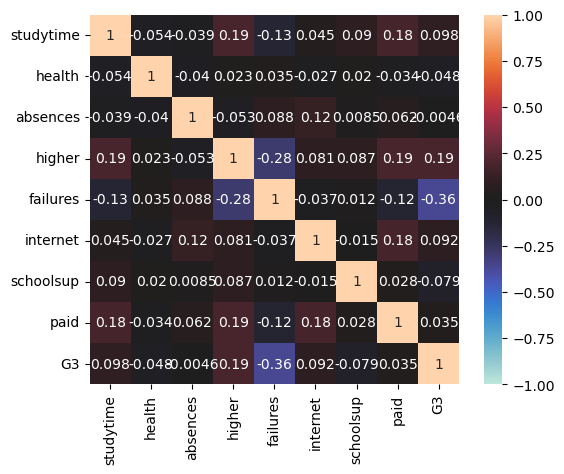

In [5]:
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center=0, square=True)

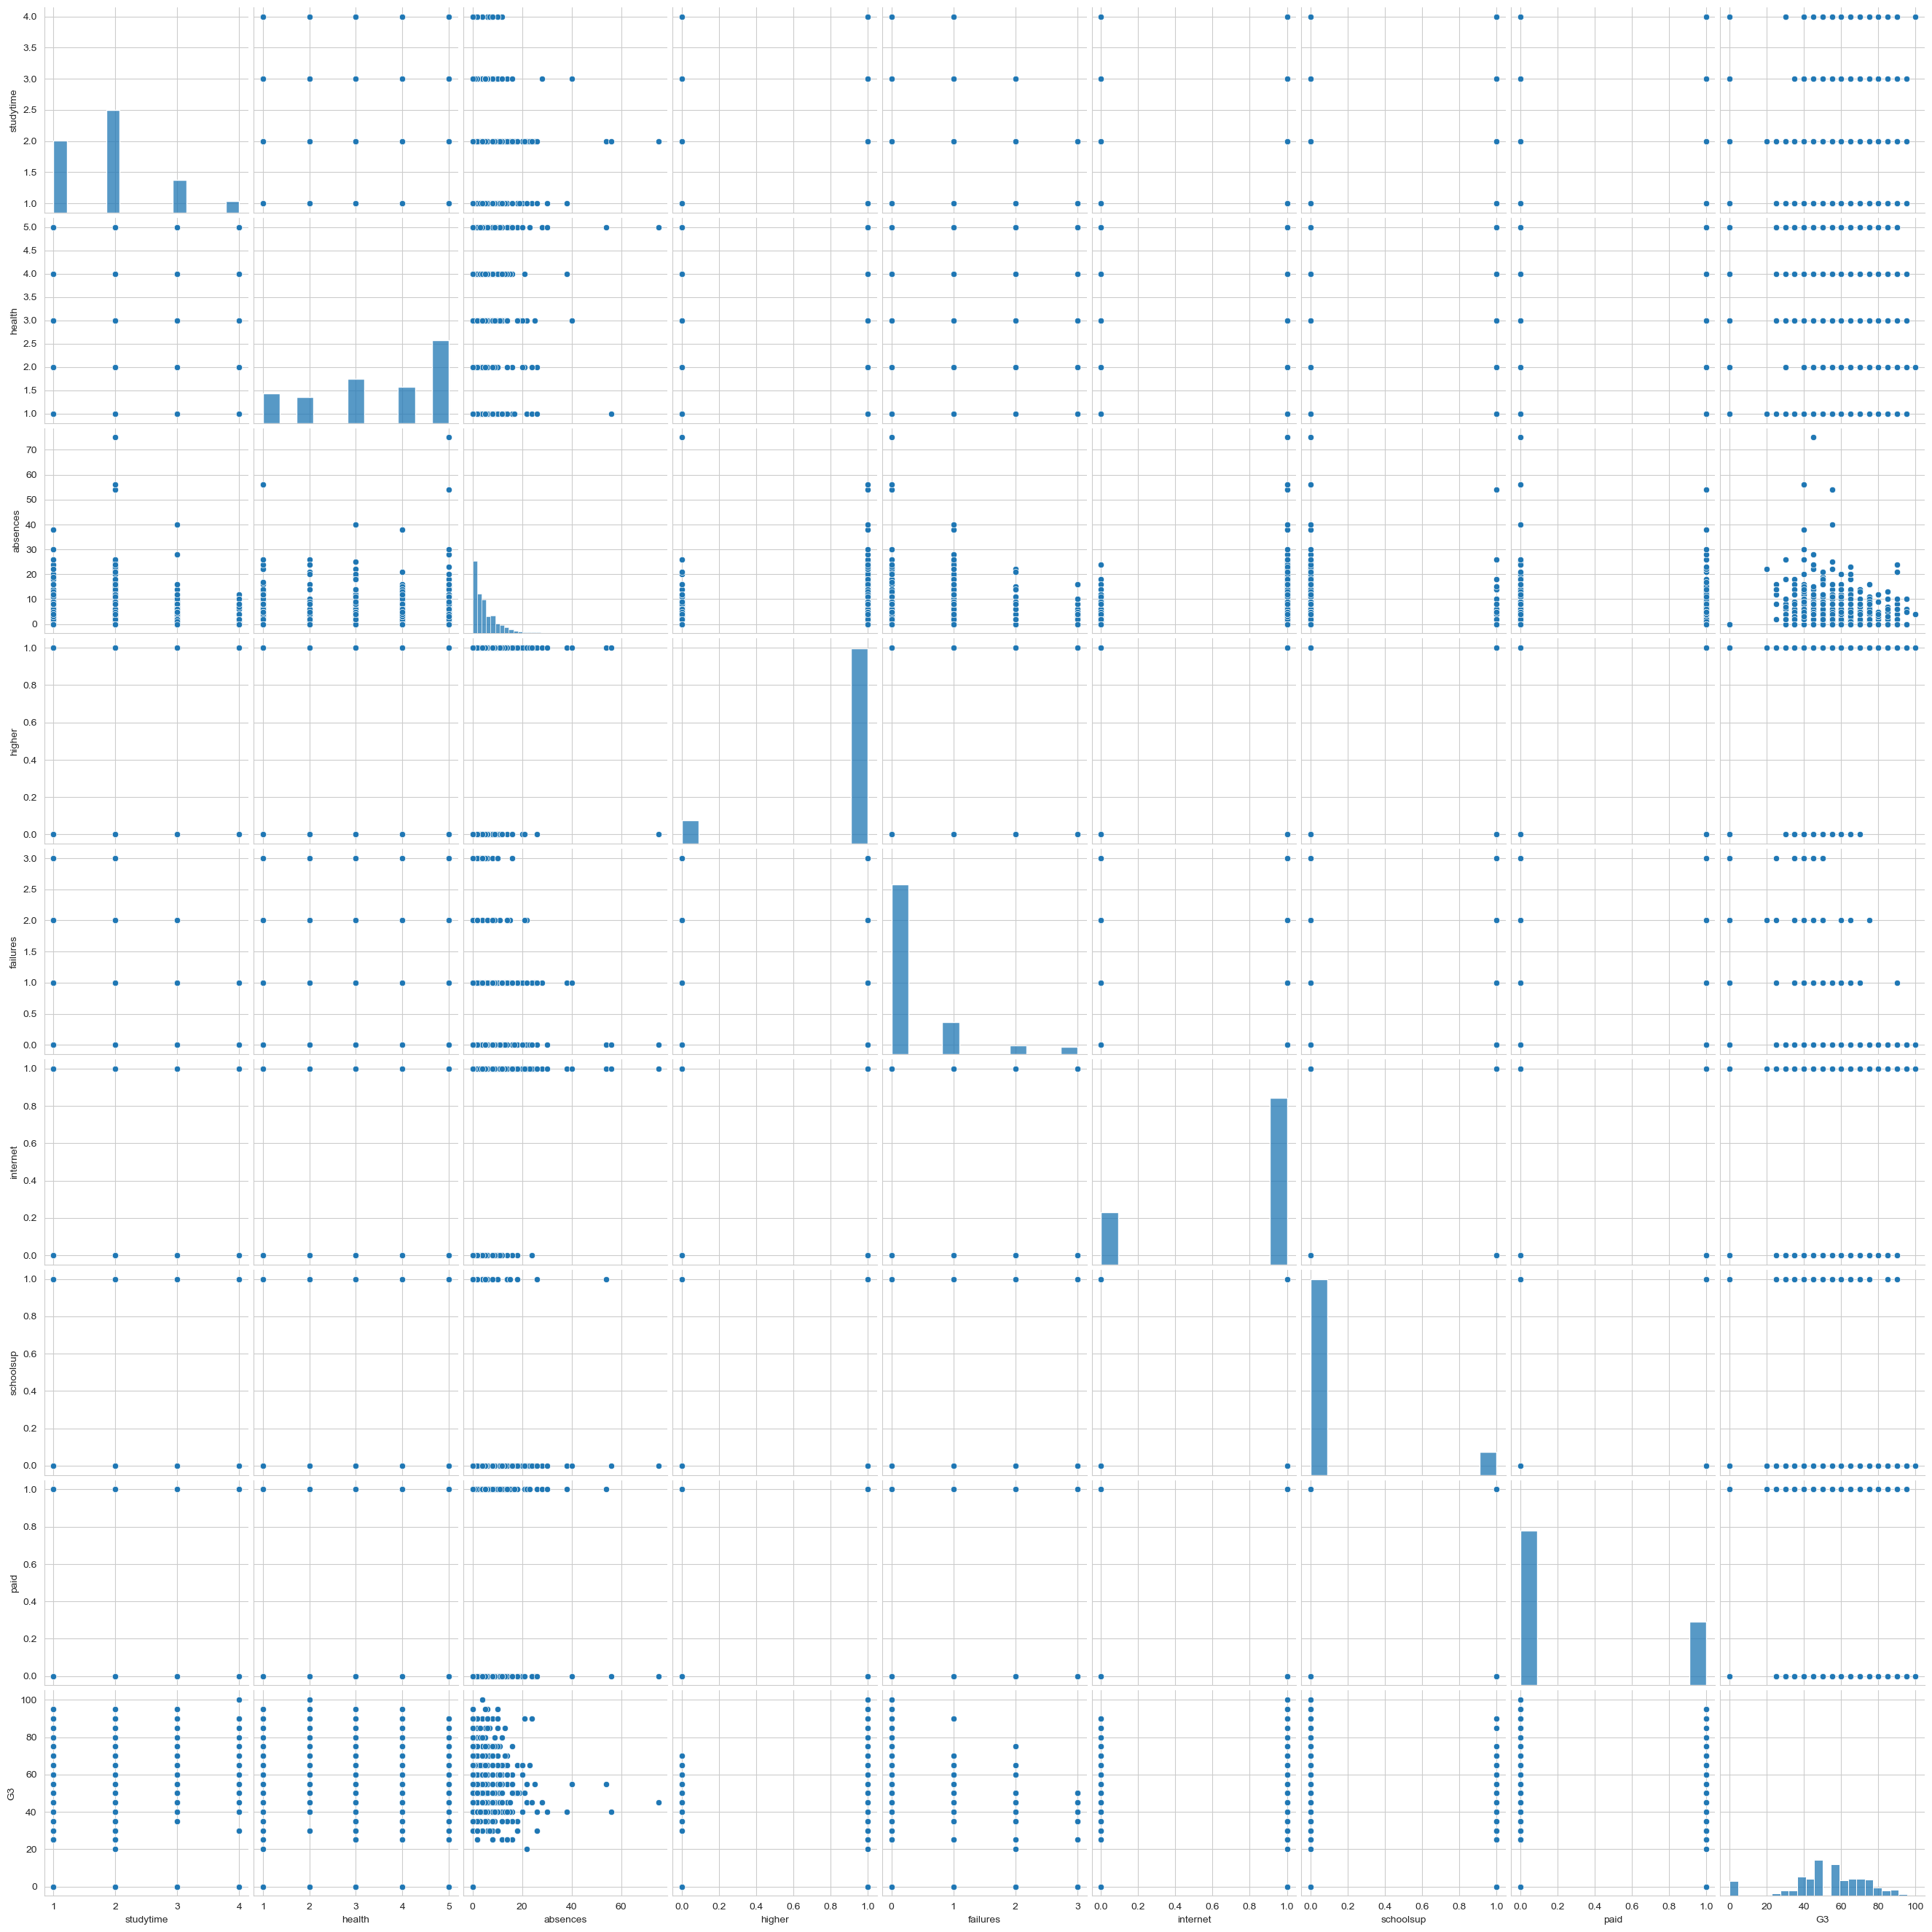

In [6]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(df, height=3);
plt.show()

# Entire Dataset

In [8]:
mappings = {
    'famsize': {'LE3': 0, 'GT3': 1},
    'Pstatus': {'T': 0, 'A': 1},
    'schoolsup': {'yes': 1, 'no': 0},
    'famsup': {'yes': 1, 'no': 0},
    'paid': {'yes': 1, 'no': 0},
    'activities': {'yes': 1, 'no': 0},
    'nursery': {'yes': 1, 'no': 0},
    'higher': {'yes': 1, 'no': 0},
    'internet': {'yes': 1, 'no': 0},
    'romantic': {'yes': 1, 'no': 0}
}


df_new = pd.read_csv('student+performance/student/student-mat.csv', sep=';')
df_new.replace(mappings, inplace=True)
df_new = df_new.drop(columns=['address','reason','guardian','school', 'sex','Mjob','Fjob','Medu','Fedu','G1','G2'])
display(df_new)

/var/folders/q_/wmmg05q151n0f531dt8tfbd00000gn/T/ipykernel_4443/3819810439.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_new.replace(mappings, inplace=True)


,age,famsize,Pstatus,traveltime,studytime,failures,schoolsup,famsup,paid,activities,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,18,1,1,2,2,0,1,0,0,0,...,0,0,4,3,4,1,1,3,6,6
1,17,1,0,1,2,0,0,1,0,0,...,1,0,5,3,3,1,1,3,4,6
2,15,0,0,1,2,3,1,0,1,0,...,1,0,4,3,2,2,3,3,10,10
3,15,1,0,1,3,0,0,1,1,1,...,1,1,3,2,2,1,1,5,2,15
4,16,1,0,1,2,0,0,1,1,0,...,0,0,4,3,2,1,2,5,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,0,1,1,2,2,0,1,1,0,...,0,0,5,5,4,4,5,4,11,9
391,17,0,0,2,1,0,0,0,0,0,...,1,0,2,4,5,3,4,2,3,16
392,21,1,0,1,1,3,0,0,0,0,...,0,0,5,5,3,3,3,3,3,7
393,18,0,0,3,1,0,0,0,0,0,...,1,0,4,4,1,3,4,5,0,10


<Axes: >

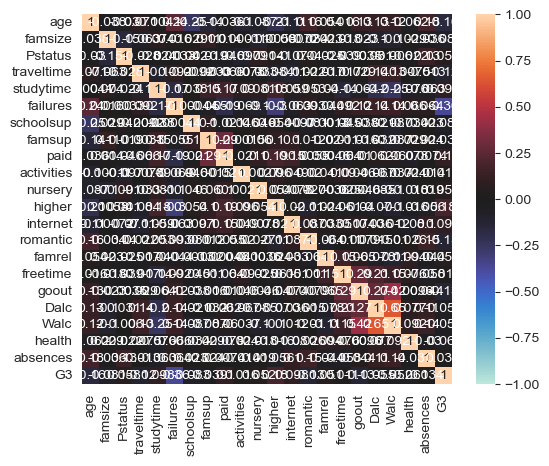

In [9]:
sns.heatmap(df_new.corr(), annot = True, vmin=-1, vmax=1, center=0, square=True)

In [25]:
display(df)

,studytime,health,absences,higher,failures,internet,schoolsup,paid,G3
0,2,3,6,1,0,0,1,0,30
1,2,3,4,1,0,1,0,0,30
2,2,3,10,1,3,1,1,1,50
3,3,5,2,1,0,1,0,1,75
4,2,5,4,1,0,0,0,1,50
...,...,...,...,...,...,...,...,...,...
1005,2,1,0,0,3,0,0,0,0
1006,3,4,5,1,0,1,0,0,75
1013,2,5,0,1,0,0,0,0,75
1027,2,3,4,1,1,1,0,0,45


<class 'pandas.core.frame.DataFrame'>
Index: 662 entries, 0 to 1037
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   studytime  662 non-null    int64
 1   health     662 non-null    int64
 2   absences   662 non-null    int64
 3   higher     662 non-null    int64
 4   failures   662 non-null    int64
 5   internet   662 non-null    int64
 6   schoolsup  662 non-null    int64
 7   paid       662 non-null    int64
 8   G3         662 non-null    int64
dtypes: int64(9)
memory usage: 51.7 KB


# Linear Regression

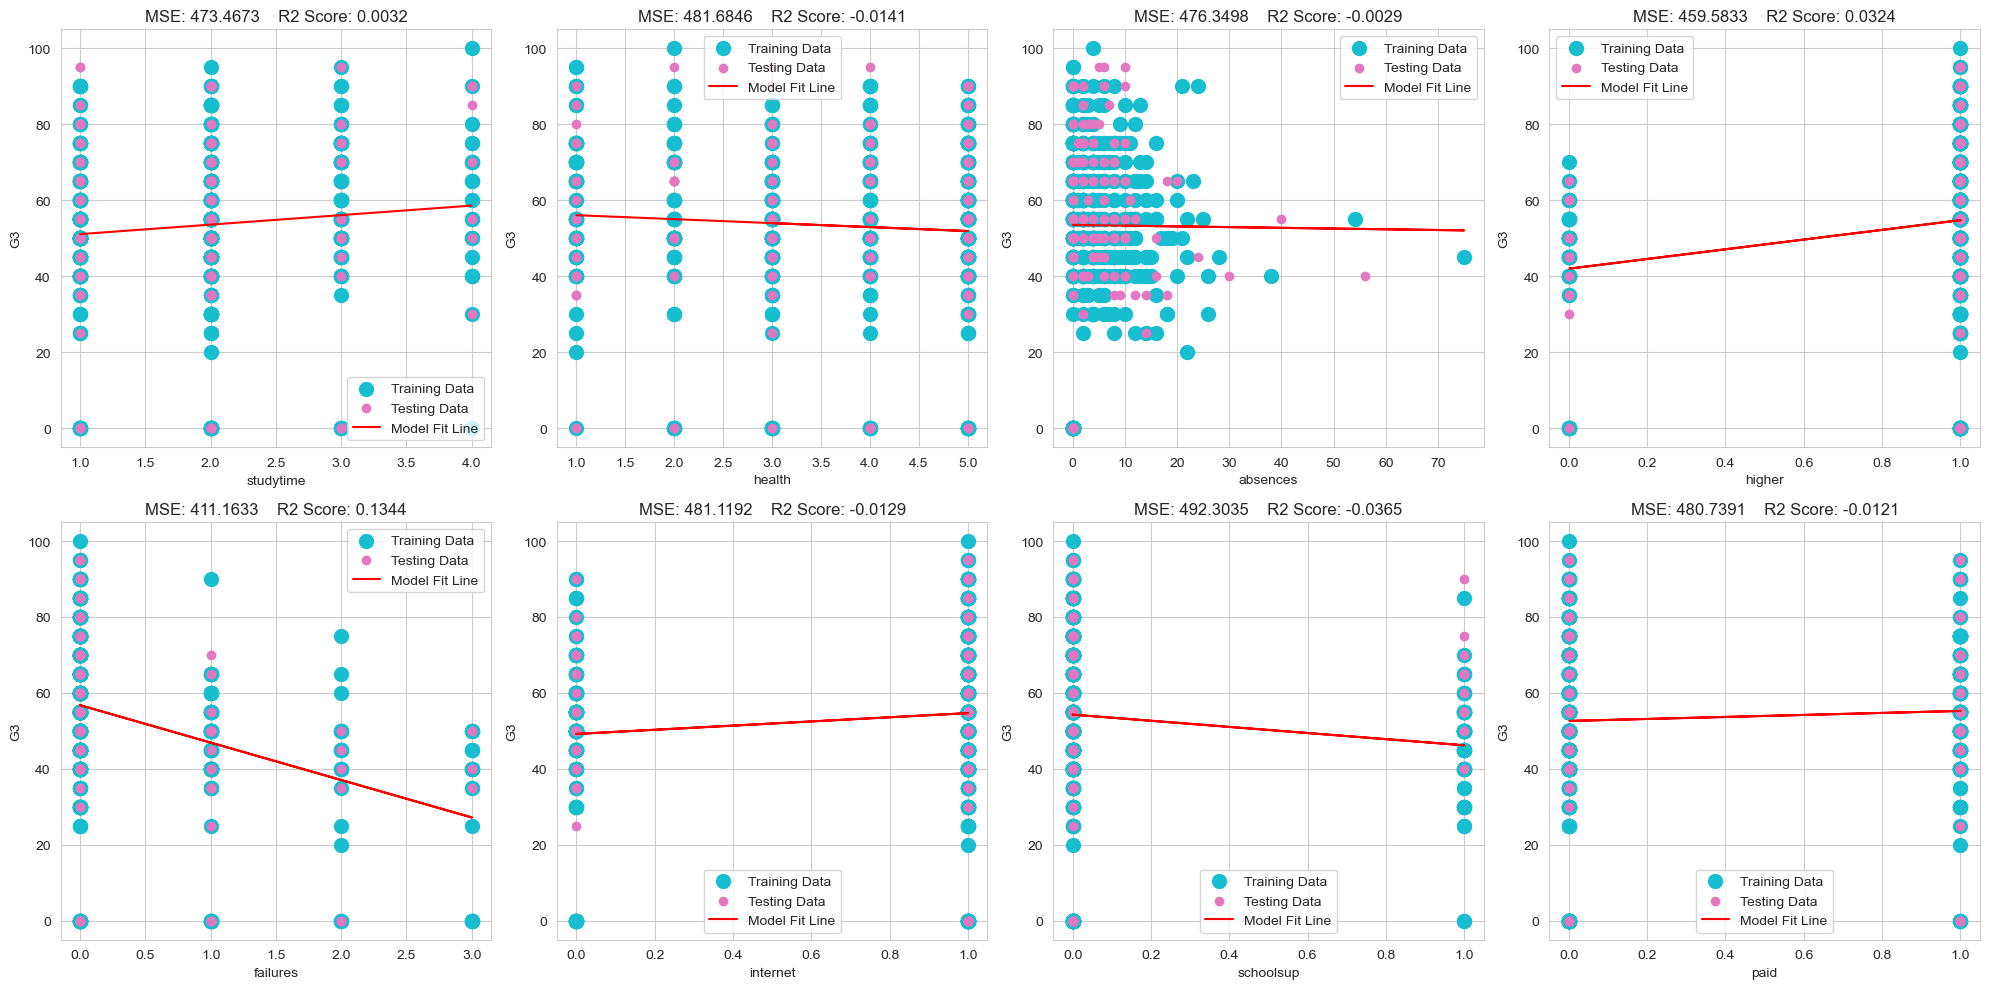

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression 

fixed_width = 5  # You can adjust this value to change the width of each plot
fixed_height = 5
plt.figure(figsize=(fixed_width * 4, fixed_height * 2))  # Set figure size based on fixed width/height


factors = ['studytime','health', 'absences','higher','failures','internet','schoolsup','paid']
i = 1
for factor in factors:
    X = df[[factor]]
    y = df['G3']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train.values.reshape(-1, 1))
    X_test_scaled = scaler.transform(X_test.values.reshape(-1, 1))
    
    m1 = LinearRegression()
    m1.fit(np.asarray(X_train).reshape(-1, 1), np.asarray(y_train).reshape(-1, 1))
    
    y_train_pred = m1.predict(np.asarray(X_train).reshape(-1,1))
    y_test_pred = m1.predict(np.asarray(X_test).reshape(-1,1))
    
    
    #print(f'Testing MSE error is: {round(mean_squared_error(y_test_pred, y_test),4)}')
    
    #plt.figure(figsize=(7,7))
    plt.subplot(2, 4, i)
    plt.scatter(X_train, y_train, color='tab:cyan', label='Training Data', s=100)
    plt.scatter(X_test, y_test, color='tab:pink', label='Testing Data')
    
    
    
    plt.plot(X_train, m1.predict(np.asarray(X_train).reshape(-1,1)), color='red', label='Model Fit Line')
    plt.title(f'MSE: {round(mean_squared_error(y_test_pred, y_test),4)}    R2 Score: {round(r2_score(y_test, y_test_pred),4)}')
    plt.xlabel(factor)
    plt.ylabel("G3")
    plt.legend()
    
    i += 1

plt.tight_layout()
plt.show()

# Polynomial Regression for Non Binary Factors

2 Degree Polynomial Regression For Non-Binary Factors:



<Figure size 2000x1000 with 0 Axes>

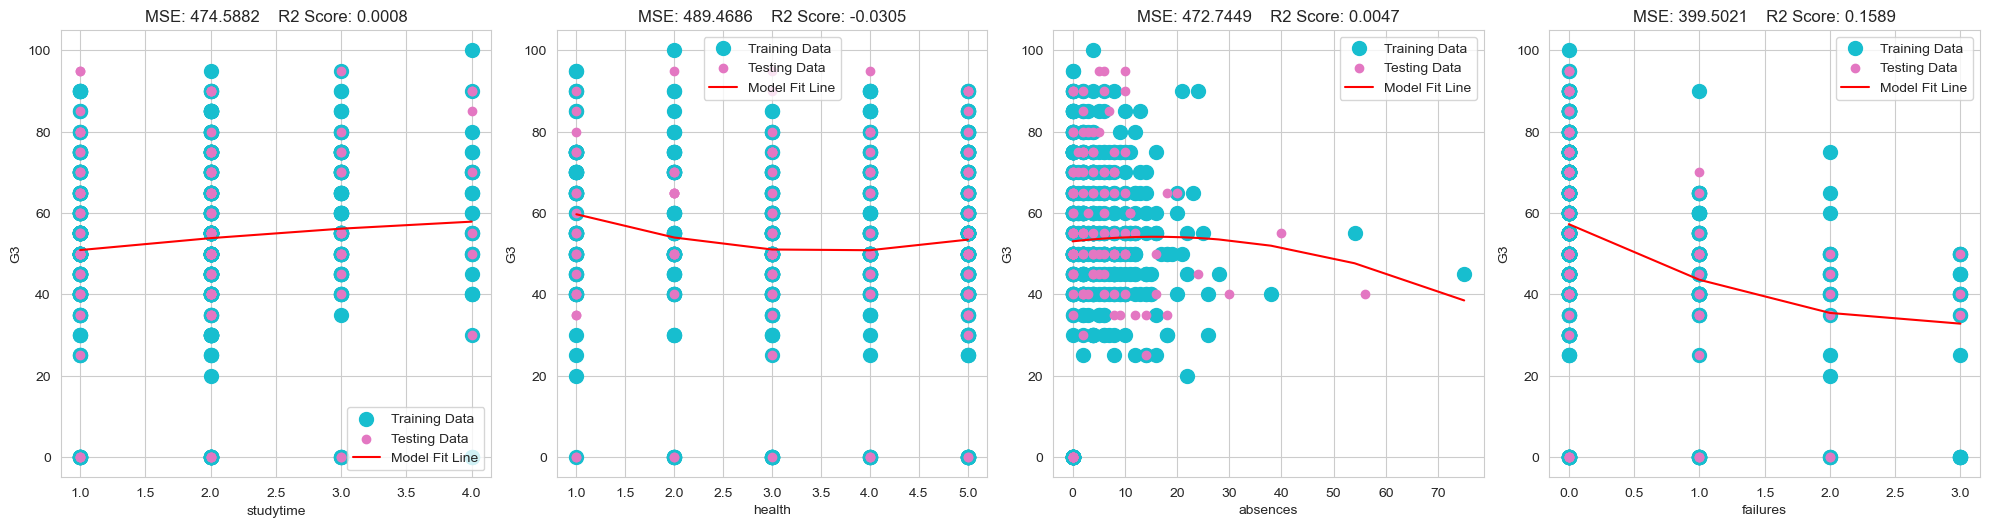

3 Degree Polynomial Regression For Non-Binary Factors:



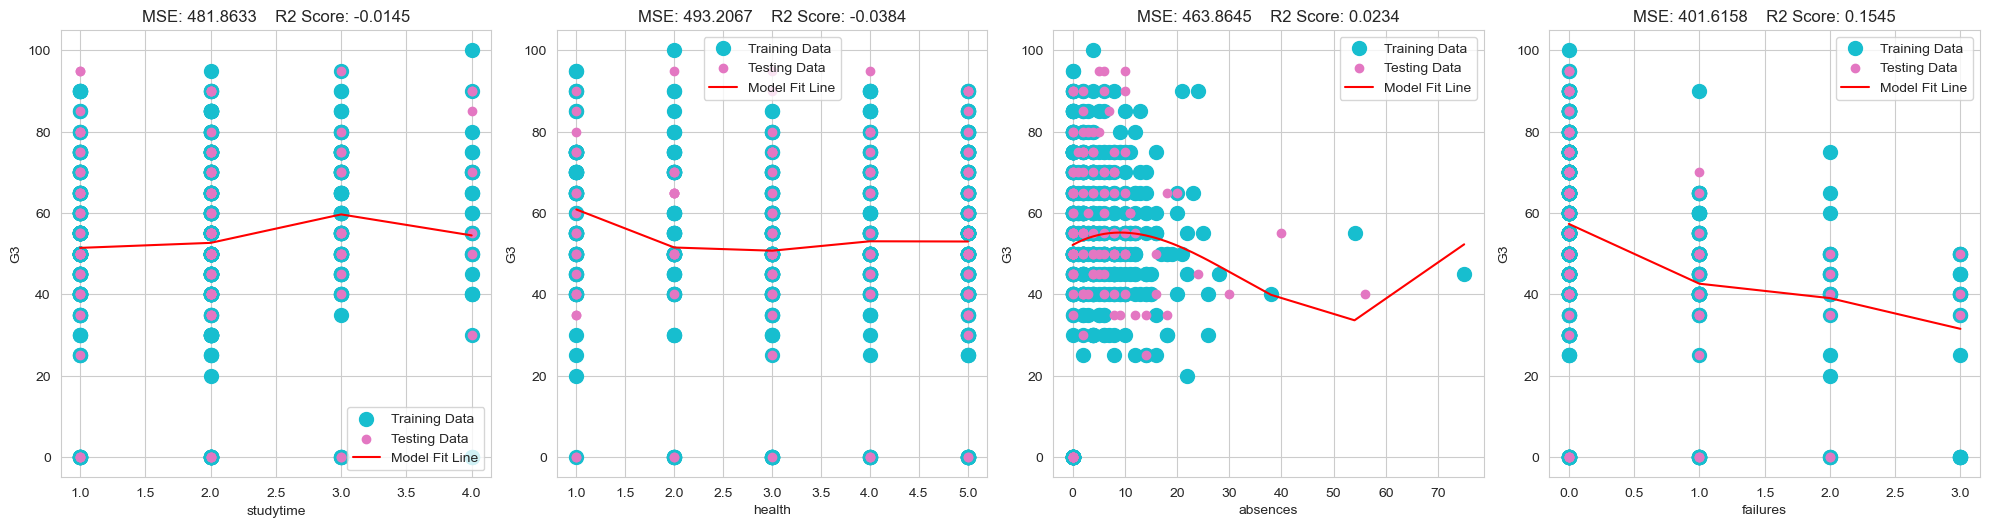

4 Degree Polynomial Regression For Non-Binary Factors:



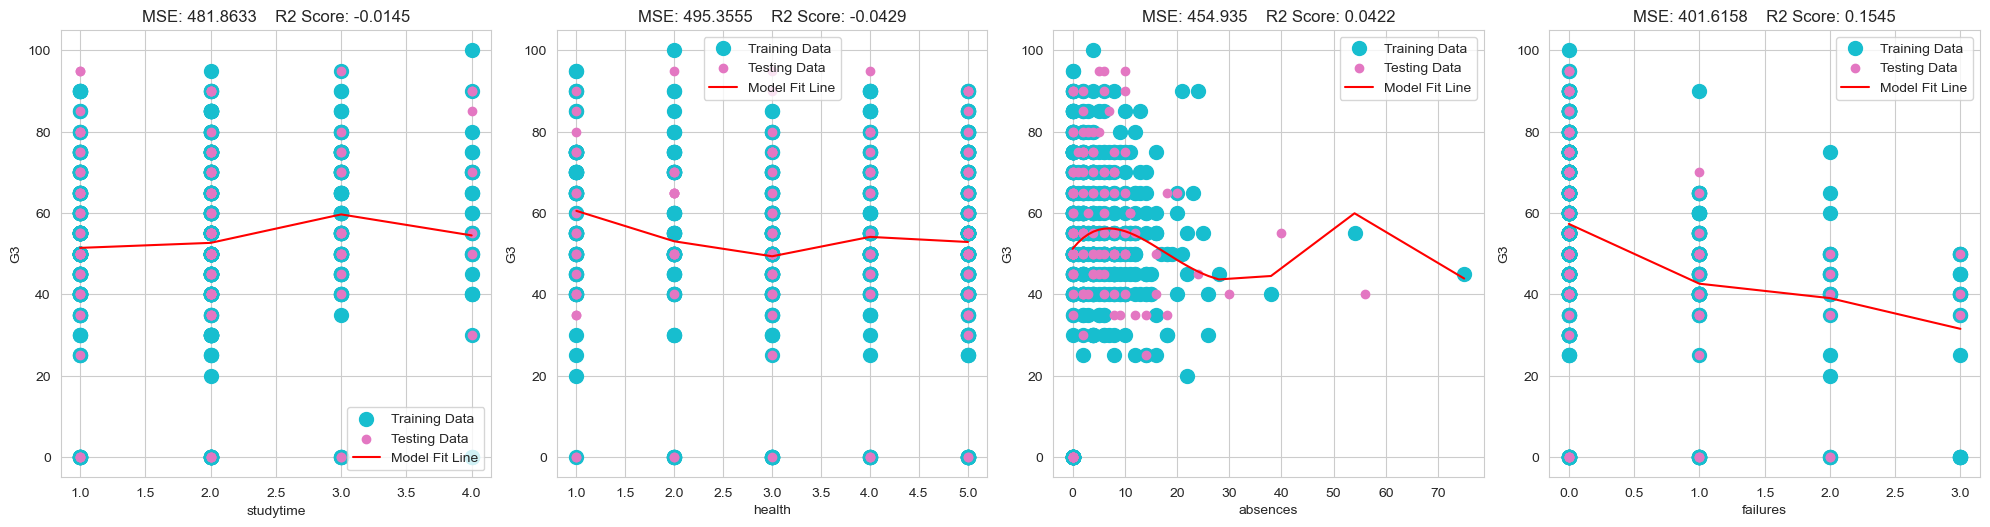

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression 

fixed_width = 5  # You can adjust this value to change the width of each plot
fixed_height = 5
plt.figure(figsize=(fixed_width * 4, fixed_height * 2))  # Set figure size based on fixed width/height



factors = ['studytime','health', 'absences','failures']

for degree in range(2,5):
    plt.figure(figsize=(fixed_width * 4, fixed_height * 2))
    polynomial_features= PolynomialFeatures(degree)
    i = 1
    print(degree,'Degree Polynomial Regression For Non-Binary Factors:\n')
    for factor in factors:
        X = df[[factor]]
        y = df['G3']
        
        X = polynomial_features.fit_transform(X)
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
        
        #scaler = StandardScaler()
        #X_train_scaled = scaler.fit_transform(X_train.values.reshape(-1, 1))
        #X_test_scaled = scaler.transform(X_test.values.reshape(-1, 1))
        
        m1 = LinearRegression()
        m1.fit(X_train, y_train)
        
        y_train_pred = m1.predict(X_train)
        y_test_pred = m1.predict(X_test)
        
        
        #print(f'Testing MSE error is: {round(mean_squared_error(y_test_pred, y_test),4)}')
        
        #plt.figure(figsize=(7,7))
        plt.subplot(2, 4, i)
        plt.scatter(X_train[:, 1], y_train, color='tab:cyan', label='Training Data', s=100)
        plt.scatter(X_test[:, 1], y_test, color='tab:pink', label='Testing Data')
        
       
        X_train_sorted_idx = np.argsort(X_train[:, 1])
        plt.plot(X_train[:, 1][X_train_sorted_idx], y_train_pred[X_train_sorted_idx], color='red', label='Model Fit Line')
    
        
        #plt.plot(X_train, m1.predict(np.asarray(X_train).reshape(-1,1)), color='red', label='Model Fit Line')
        plt.title(f'MSE: {round(mean_squared_error(y_test_pred, y_test),4)}    R2 Score: {round(r2_score(y_test, y_test_pred),4)}')
        plt.xlabel(factor)
        plt.ylabel("G3")
        plt.legend()
        
        i += 1
    
    plt.tight_layout()
    plt.show()